1. Chọn quả kiwi và tịnh tiến sang phải 30 pixels

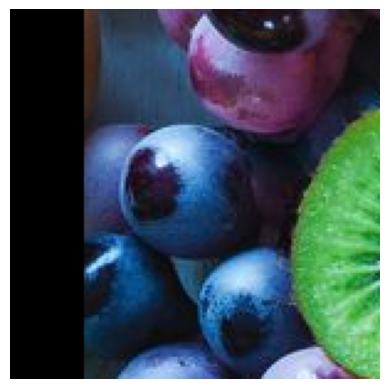

In [1]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")
kiwi = img[100:250, 50:200]  # Giả sử vùng chứa quả kiwi
kiwi_shifted = nd.shift(kiwi, (0, 30, 0))
plt.imshow(kiwi_shifted)
plt.axis('off')
plt.show()


2. Chọn quả đu đủ và dưa hấu, đổi màu cho nhau

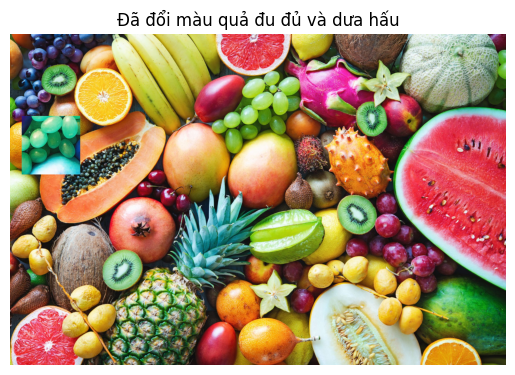

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")
papaya = img[350:600, 50:300]
watermelon = img[250:500, 950:1200]

# Đổi màu (đảo kênh RGB)
papaya_swapped = papaya[..., ::-1]
watermelon_swapped = watermelon[..., ::-1]

img[350:600, 50:300] = watermelon_swapped
img[250:500, 950:1200] = papaya_swapped

plt.imshow(img)
plt.axis('off')
plt.title("Đã đổi màu quả đu đủ và dưa hấu")
plt.show()


3. Chọn núi và thuyền, xoay 45 độ và lưu

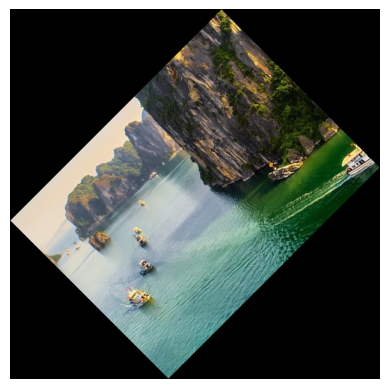

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = iio.imread("exercise/quang_ninh.jpg")
mountain_boat = img[100:400, 200:600]
rotated = nd.rotate(mountain_boat, 45, reshape=True)
iio.imwrite("mountain_boat_rotated.jpg", rotated)
plt.imshow(rotated)
plt.axis('off')
plt.show()



4. Tăng kích thước ngôi chùa lên 5 lần và lưu

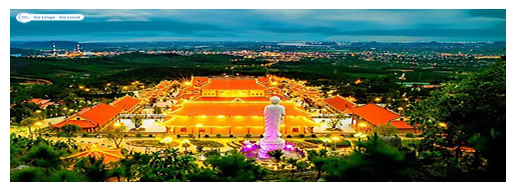

In [9]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = iio.imread("exercise/pagoda.jpg")
zoomed = nd.zoom(img, (15, 25, 1))  # Phóng to 15 lần mỗi chiều
iio.imwrite("pagoda_zoomed.jpg", zoomed)
plt.imshow(zoomed)
plt.axis('off')
plt.show()



5. Menu thao tác (Tịnh tiến, Xoay, Phóng to, Thu nhỏ, Coordinate Map)

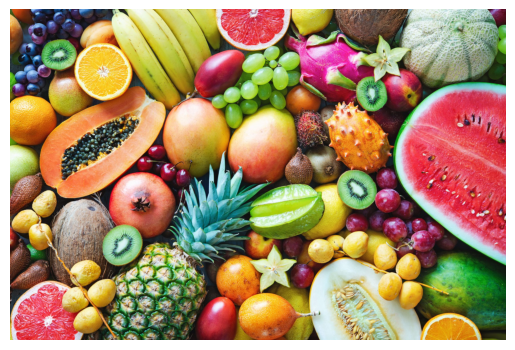

In [7]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def coordinate_map(coord):
    a = 10 * np.cos(coord[0] / 10.0) + coord[0]
    b = 10 * np.cos(coord[1] / 10.0) + coord[1]
    return a, b

def transform_image(img_path, mode):
    img = iio.imread(img_path)
    if mode == 'T':
        result = nd.shift(img, (50, 50, 0))
    elif mode == 'X':
        result = nd.rotate(img, 45, reshape=True)
    elif mode == 'P':
        result = nd.zoom(img, (2, 2, 1))
    elif mode == 'H':
        result = nd.zoom(img, (0.5, 0.5, 1))
    elif mode == 'C':
        result = nd.geometric_transform(img, coordinate_map)
    else:
        print("Lựa chọn không hợp lệ")
        return

    plt.imshow(result)
    plt.axis('off')
    plt.show()

# Ví dụ gọi menu
image_choice = input("Chọn ảnh (1: fruits, 2: quang_ninh, 3: pagoda): ")
if image_choice == '1':
    path = "exercise/colorful-ripe-tropical-fruits.jpg"
elif image_choice == '2':
    path = "exercise/quang_ninh.jpg"
else:
    path = "exercise/pagoda.jpg"

mode = input("Chọn thao tác: T (Tịnh tiến), X (Xoay), P (Phóng to), H (Thu nhỏ), C (Coordinate Map): ").upper()
transform_image(path, mode)
